# Exploratory Data Analysis of Streaming Shows and their Critic + Audience Scores (data sourced from Kaggle)

In [69]:
# importing necessary libraries for EDA
import pandas as pd
import numpy as np

In [70]:
tv_shows = pd.read_csv('/content/streamingdata/tv_show_links.csv')
audience = pd.read_csv('/content/streamingdata/audience_reviews.csv')
critics = pd.read_csv('/content/streamingdata/critic_reviews.csv')

In [71]:
#check each df and make sure data loaded properly
tv_shows.head(5)

,Network,Show,Critic Score,Audience Score,tv_link
0,Apple TV+,Loot,80%,65%,https://www.rottentomatoes.com/tv/loot
1,Apple TV+,For All Mankind,91%,83%,https://www.rottentomatoes.com/tv/for_all_mankind
2,Apple TV+,Severance,97%,93%,https://www.rottentomatoes.com/tv/severance
3,Apple TV+,Shining Girls,83%,88%,https://www.rottentomatoes.com/tv/shining_girls
4,Apple TV+,Tehran,94%,91%,https://www.rottentomatoes.com/tv/tehran


In [72]:
# get the current columns in tv show df
cols = tv_shows.columns.tolist()

# move 'network' to second index in df
cols.remove('Network')           # this removes it from current position (0 index)
cols.insert(1, 'Network')        # insert at index 1 (second position)

# reorder the tv shows dataframe
tv_shows = tv_shows[cols]

In [73]:
#check to make sure it moved and it did!
tv_shows.head(5)

,Show,Network,Critic Score,Audience Score,tv_link
0,Loot,Apple TV+,80%,65%,https://www.rottentomatoes.com/tv/loot
1,For All Mankind,Apple TV+,91%,83%,https://www.rottentomatoes.com/tv/for_all_mankind
2,Severance,Apple TV+,97%,93%,https://www.rottentomatoes.com/tv/severance
3,Shining Girls,Apple TV+,83%,88%,https://www.rottentomatoes.com/tv/shining_girls
4,Tehran,Apple TV+,94%,91%,https://www.rottentomatoes.com/tv/tehran


In [74]:
audience.head(5)

,Show,Rating,Review
0,Test,0.0,Test review
1,Loot,2.5,"I love the stars, but the show is riddled with..."
2,Loot,4.5,Great show to watch. It's something that's eas...
3,Loot,0.5,Another Apple tanker crashes into the reef wit...
4,Loot,4.5,"This is such a fun, endearing show. It has a ..."


In [75]:
audience.rename(columns={'Review': 'audience_review'}, inplace=True)
audience.head(5)

,Show,Rating,audience_review
0,Test,0.0,Test review
1,Loot,2.5,"I love the stars, but the show is riddled with..."
2,Loot,4.5,Great show to watch. It's something that's eas...
3,Loot,0.5,Another Apple tanker crashes into the reef wit...
4,Loot,4.5,"This is such a fun, endearing show. It has a ..."


In [76]:
critics.head(5)

,Show,Sentiment,Review
0,Mare of Easttown,1,I’m not sure I have engaged in appointment vie...
1,Mare of Easttown,1,Kate is marvelous; she truly is Mare. She disa...
2,Mare of Easttown,1,That’s the thing I’ve loved most about Mare: t...
3,Mare of Easttown,1,"Boasting Kate Winslet in the title role, twist..."
4,Mare of Easttown,1,"Performances in which madness, psychopathy or ..."


In [77]:
critics.rename(columns={'Review': 'critic_review'}, inplace=True)
critics.head(5)

,Show,Sentiment,critic_review
0,Mare of Easttown,1,I’m not sure I have engaged in appointment vie...
1,Mare of Easttown,1,Kate is marvelous; she truly is Mare. She disa...
2,Mare of Easttown,1,That’s the thing I’ve loved most about Mare: t...
3,Mare of Easttown,1,"Boasting Kate Winslet in the title role, twist..."
4,Mare of Easttown,1,"Performances in which madness, psychopathy or ..."


In [78]:
# renaming columns before the big merge

tv_shows.rename(columns={
    'Show': 'show',
    'Network': 'network',
    'Critic Score': 'critic_score',
    'Audience Score': 'audience_score',
    'tv_link': 'tv_link'
}, inplace=True)

audience.rename(columns={
    'Show': 'show',
    'Rating': 'rating',
    'audience_review': 'audience_review'
}, inplace=True)

critics.rename(columns={
    'Show': 'show',
    'Sentiment': 'critic_sentiment',
    'critic_review': 'critic_review'
}, inplace=True)


In [79]:
# merge into one big dataset

# merge tv show dataframe with audience reviews
audience_merged = audience.merge(tv_shows, on='show', how='left')

# merge tv show data with critic reviews
critic_merged = critics.merge(tv_shows, on='show', how='left')

# add in missing columns so both have the same layout
audience_merged['critic_sentiment'] = None
critic_merged['rating'] = None
audience_merged['critic_review'] = None
critic_merged['audience_review'] = None

# add review type flag
audience_merged['review_type'] = 'audience'
critic_merged['review_type'] = 'critic'

# combine both dfs with concat function
streaming_data = pd.concat([audience_merged, critic_merged], ignore_index=True)

/tmp/ipython-input-3543603856.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  streaming_data = pd.concat([audience_merged, critic_merged], ignore_index=True)


In [80]:
streaming_data.head(5)

,show,rating,audience_review,network,critic_score,audience_score,tv_link,critic_sentiment,critic_review,review_type
0,Test,0.0,Test review,NaN,NaN,NaN,NaN,None,None,audience
1,Loot,2.5,"I love the stars, but the show is riddled with...",Apple TV+,80%,65%,https://www.rottentomatoes.com/tv/loot,None,None,audience
2,Loot,4.5,Great show to watch. It's something that's eas...,Apple TV+,80%,65%,https://www.rottentomatoes.com/tv/loot,None,None,audience
3,Loot,0.5,Another Apple tanker crashes into the reef wit...,Apple TV+,80%,65%,https://www.rottentomatoes.com/tv/loot,None,None,audience
4,Loot,4.5,"This is such a fun, endearing show. It has a ...",Apple TV+,80%,65%,https://www.rottentomatoes.com/tv/loot,None,None,audience


In [81]:
streaming_data = streaming_data[streaming_data['show'] != 'Test']
streaming_data.head(5)

,show,rating,audience_review,network,critic_score,audience_score,tv_link,critic_sentiment,critic_review,review_type
1,Loot,2.5,"I love the stars, but the show is riddled with...",Apple TV+,80%,65%,https://www.rottentomatoes.com/tv/loot,None,None,audience
2,Loot,4.5,Great show to watch. It's something that's eas...,Apple TV+,80%,65%,https://www.rottentomatoes.com/tv/loot,None,None,audience
3,Loot,0.5,Another Apple tanker crashes into the reef wit...,Apple TV+,80%,65%,https://www.rottentomatoes.com/tv/loot,None,None,audience
4,Loot,4.5,"This is such a fun, endearing show. It has a ...",Apple TV+,80%,65%,https://www.rottentomatoes.com/tv/loot,None,None,audience
5,Loot,0.5,Terrible show - didn't laugh once. Acting is s...,Apple TV+,80%,65%,https://www.rottentomatoes.com/tv/loot,None,None,audience


In [82]:
# dropping the tv link column bc we dont need it for EDA
streaming_data.drop(columns='tv_link', inplace=True)

In [83]:
# check the datafram
streaming_data.head(5) #looks finalized

,show,rating,audience_review,network,critic_score,audience_score,critic_sentiment,critic_review,review_type
1,Loot,2.5,"I love the stars, but the show is riddled with...",Apple TV+,80%,65%,None,None,audience
2,Loot,4.5,Great show to watch. It's something that's eas...,Apple TV+,80%,65%,None,None,audience
3,Loot,0.5,Another Apple tanker crashes into the reef wit...,Apple TV+,80%,65%,None,None,audience
4,Loot,4.5,"This is such a fun, endearing show. It has a ...",Apple TV+,80%,65%,None,None,audience
5,Loot,0.5,Terrible show - didn't laugh once. Acting is s...,Apple TV+,80%,65%,None,None,audience


In [84]:
# Finding Hidden Gem TV Shows
# hidden gem is classified as a tv show that has a low critic score but high audience rating
# metric to find the hidden gem is -- hidden_gem_score = audience_score_norm - critic_score_norm

In [85]:
# start by finding the average critic and audience score per show

In [86]:
# avg critic sentiment per show (0–1 scale) - 0 is neg and 1 is positive
critic_avg = streaming_data.groupby('show', as_index=False)['critic_sentiment'].mean()

# avg audience rating per show (0–5 scale)
audience_avg = streaming_data.groupby('show', as_index=False)['rating'].mean()

In [87]:
#check numbers
critic_avg.head(5)

,show,critic_sentiment
0,11.22.63,0.828125
1,13 Reasons Why,0.25
2,1883,0.875
3,1971: The Year That Music Changed Everything,1.0
4,24,0.818182


In [88]:
audience_avg.head(5) # both makes sense

,show,rating
0,11.22.63,3.940625
1,13 Reasons Why,2.801887
2,1883,3.752500
3,1971: The Year That Music Changed Everything,2.392857
4,24,4.122449


In [89]:
# merging critics and audience average
hidden_gems = critic_avg.merge(audience_avg, on='show', how='outer')
hidden_gems.head(5)

,show,critic_sentiment,rating
0,11.22.63,0.828125,3.940625
1,13 Reasons Why,0.25,2.801887
2,1883,0.875,3.752500
3,1971: The Year That Music Changed Everything,1.0,2.392857
4,24,0.818182,4.122449


In [90]:
# now normalieze the #s into same scale
hidden_gems['critic_score_norm'] = hidden_gems['critic_sentiment'] * 100
hidden_gems['audience_score_norm'] = (hidden_gems['rating'] / 5) * 100
hidden_gems.head(5)

,show,critic_sentiment,rating,critic_score_norm,audience_score_norm
0,11.22.63,0.828125,3.940625,82.8125,78.812500
1,13 Reasons Why,0.25,2.801887,25.0,56.037736
2,1883,0.875,3.752500,87.5,75.050000
3,1971: The Year That Music Changed Everything,1.0,2.392857,100.0,47.857143
4,24,0.818182,4.122449,81.818182,82.448980


In [93]:
#calculation of the hidden gem score
hidden_gems['hidden_gem_score'] = hidden_gems['audience_score_norm'] - hidden_gems['critic_score_norm']

In [94]:
# see what the hidden gems are
hidden_gems.head(5)

,show,critic_sentiment,rating,critic_score_norm,audience_score_norm,hidden_gem_score
0,11.22.63,0.828125,3.940625,82.8125,78.812500,-4.0
1,13 Reasons Why,0.25,2.801887,25.0,56.037736,31.037736
2,1883,0.875,3.752500,87.5,75.050000,-12.45
3,1971: The Year That Music Changed Everything,1.0,2.392857,100.0,47.857143,-52.142857
4,24,0.818182,4.122449,81.818182,82.448980,0.630798


In [ ]:
# if the hidden gem score is positive then those shows are hidden gems!

In [95]:
# sorting the hidden gems
hidden_gems_sorted = hidden_gems.sort_values(by='hidden_gem_score', ascending=False)

In [97]:
# Top 10 Hidden Gem TV Shows (? - 2022)
hidden_gems_sorted.head(10)

,show,critic_sentiment,rating,critic_score_norm,audience_score_norm,hidden_gem_score
329,RuPaul's Drag Race: All Stars,0.0,3.833333,0.0,76.666667,76.666667
327,"Roswell, New Mexico",0.0,3.500000,0.0,70.000000,70.0
252,Mayor of Kingstown,0.32,4.246875,32.0,84.937500,52.9375
424,The Endgame,0.333333,4.103774,33.333333,82.075472,48.742138
357,Snowflake Mountain,0.0,2.400000,0.0,48.000000,48.0
147,God's Favorite Idiot,0.2,3.383117,20.0,67.662338,47.662338
495,The Time Traveler's Wife,0.375,4.062092,37.5,81.241830,43.74183
467,The Offer,0.54,4.695238,54.0,93.904762,39.904762
188,Joe vs Carole,0.333333,3.583333,33.333333,71.666667,38.333333
184,Jericho,0.6,4.833333,60.0,96.666667,36.666667


In [98]:
# now merging the hidden_gems df to the main one - streaming_data
# i only need show and hidden_gem_score for the merge
hidden_gems_for_merge = hidden_gems[['show', 'hidden_gem_score']]

In [99]:
streaming_data = streaming_data.merge(hidden_gems_for_merge, on='show', how='left')
streaming_data.head(5)

,show,rating,audience_review,network,critic_score,audience_score,critic_sentiment,critic_review,review_type,hidden_gem_score
0,Loot,2.5,"I love the stars, but the show is riddled with...",Apple TV+,80%,65%,None,None,audience,-27.619048
1,Loot,4.5,Great show to watch. It's something that's eas...,Apple TV+,80%,65%,None,None,audience,-27.619048
2,Loot,0.5,Another Apple tanker crashes into the reef wit...,Apple TV+,80%,65%,None,None,audience,-27.619048
3,Loot,4.5,"This is such a fun, endearing show. It has a ...",Apple TV+,80%,65%,None,None,audience,-27.619048
4,Loot,0.5,Terrible show - didn't laugh once. Acting is s...,Apple TV+,80%,65%,None,None,audience,-27.619048


# Visualizations of Data
## Now that the dataset has been made and hidden gems found I want to make some data visualizations to highlight any more insights found

Some visualizations include:


*   Bar Chart (gives us a simple look into what shows are hidden gems)
*   Review Word Cloud (shows us what specific words audiences used to show their love for the shows - potentially give insight into what would indicate a potential hidden gem show)
*   Interactive Plot -







In [104]:
hidden_gems.head(10)
# use hidden gems df because there's no dups in this df it's just show name and all the scores

,show,critic_sentiment,rating,critic_score_norm,audience_score_norm,hidden_gem_score
0,11.22.63,0.828125,3.940625,82.8125,78.812500,-4.0
1,13 Reasons Why,0.25,2.801887,25.0,56.037736,31.037736
2,1883,0.875,3.752500,87.5,75.050000,-12.45
3,1971: The Year That Music Changed Everything,1.0,2.392857,100.0,47.857143,-52.142857
4,24,0.818182,4.122449,81.818182,82.448980,0.630798
5,30 Coins,0.909091,3.833333,90.909091,76.666667,-14.242424
6,30 Rock,0.933333,4.323529,93.333333,86.470588,-6.862745
7,8 Simple Rules,1.0,NaN,100.0,NaN,NaN
8,A Little Late With Lilly Singh,NaN,1.516129,NaN,30.322581,NaN
9,A Teacher,0.727273,2.838235,72.727273,56.764706,-15.962567


/tmp/ipython-input-1782993969.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hidden_gem_score', y='show', data=top_gems, palette='viridis')


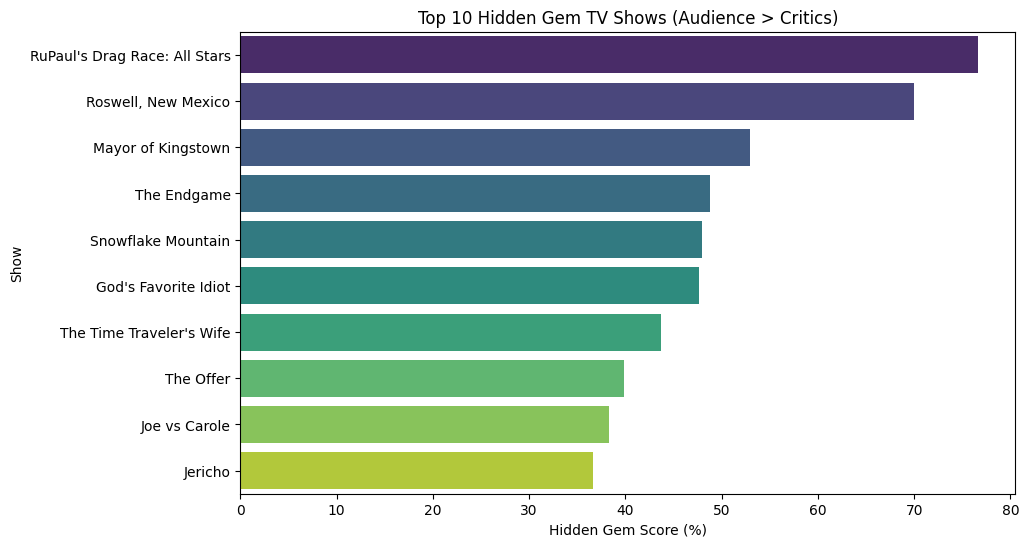

In [111]:
# importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 hidden gems (Bar Chart)
top_gems = hidden_gems.sort_values(by='hidden_gem_score', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='hidden_gem_score', y='show', data=top_gems, palette='viridis')
plt.title('Top 10 Hidden Gem TV Shows (Audience > Critics)')
plt.xlabel('Hidden Gem Score (%)')
plt.ylabel('Show')
plt.show()

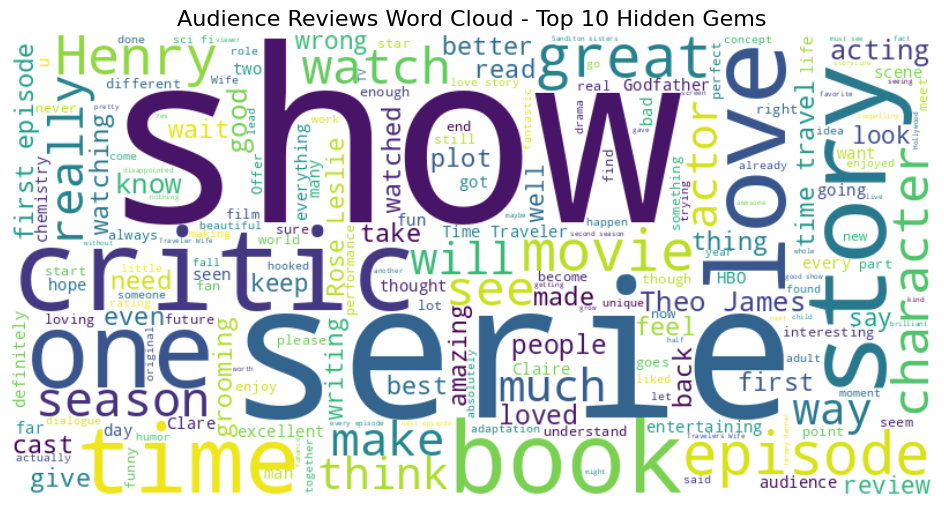

In [115]:
# word cloud for top hidden gem show

# first get top 10 shows depicted in visualization above
top_10_shows = hidden_gems.sort_values(by='hidden_gem_score', ascending=False).head(10)['show'].tolist()

# then import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# next ill filter streaming_data dataframe for top 10 shows and combine their audience reviews
text = " ".join(
    streaming_data[streaming_data['show'].isin(top_10_shows)]['audience_review'].dropna()
)

# word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# display
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Audience Reviews Word Cloud - Top 10 Hidden Gems', fontsize=16)
plt.show()

In [ ]:
# top words from reviews the top 10 hidden gems are show/serie, book, love, great, story, character and acting!

In [117]:
# fix up data for interactive plot
hidden_gems['hidden_gem_score'] = pd.to_numeric(hidden_gems['hidden_gem_score'], errors='coerce')

In [118]:
hidden_gems['hidden_gem_size'] = hidden_gems['hidden_gem_score'].abs()


In [119]:
# make the smallest score 0
min_score = hidden_gems['hidden_gem_score'].min()
hidden_gems['hidden_gem_size'] = hidden_gems['hidden_gem_score'] - min_score

In [124]:
import plotly.express as px
import pandas as pd

# Merge network info
hidden_gems_with_network = hidden_gems.merge(tv_shows[['show','network']], on='show', how='left')

# Ensure hidden_gem_score is numeric
hidden_gems_with_network['hidden_gem_score'] = pd.to_numeric(hidden_gems_with_network['hidden_gem_score'], errors='coerce')

# Drop rows where hidden_gem_score is NaN
hidden_gems_with_network = hidden_gems_with_network.dropna(subset=['hidden_gem_score'])

# Create size column (shift so minimum is 0)
min_score = hidden_gems_with_network['hidden_gem_score'].min()
hidden_gems_with_network['hidden_gem_size'] = hidden_gems_with_network['hidden_gem_score'] - min_score

# Scatter plot
fig = px.scatter(
    hidden_gems_with_network,
    x='critic_score_norm',
    y='audience_score_norm',
    size='hidden_gem_size',
    color='network',
    hover_name='show',
    hover_data=['hidden_gem_score'],
    labels={'critic_score_norm':'Critic Sentiment (%)',
            'audience_score_norm':'Audience Rating (%)'},
    title='Hidden Gems: Audience vs Critic Ratings by Network'
)

fig.show()

In [ ]:
# so it looks like Netflix and Hulu are more prone to having hidden gem shows!